In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartrate_seconds_merged.csv to heartrate_seconds_merged (1).csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
heartrate_seconds_merged = pd.read_csv('heartrate_seconds_merged.csv')

In [ ]:
heartrate_seconds_merged.head()

Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101

In [ ]:
heartrate_seconds_merged.shape

(2483658, 3)

In [ ]:
heartrate_seconds_merged.isna().sum()

Id       0
Time     0
Value    0
dtype: int64

In [ ]:
heartrate_seconds_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [ ]:
heartrate_seconds_merged.duplicated().sum()

0

In [ ]:
# to convert Date in proper format
heartrate_seconds_merged['Time'] = pd.to_datetime(heartrate_seconds_merged['Time'])
heartrate_seconds_merged['Time'] =pd.to_datetime(heartrate_seconds_merged['Time']).dt.strftime('%d/%m/%Y %H:%M:%S')
heartrate_seconds_merged['Time'] = heartrate_seconds_merged['Time'].str.replace('/', '-')
heartrate_seconds_merged.head()

Id                 Time  Value
0  2022484408  12-04-2016 07:21:00     97
1  2022484408  12-04-2016 07:21:05    102
2  2022484408  12-04-2016 07:21:10    105
3  2022484408  12-04-2016 07:21:20    103
4  2022484408  12-04-2016 07:21:25    101

In [ ]:
heartrate_seconds_merged['Time'] = pd.to_datetime(heartrate_seconds_merged['Time'], format='%d-%m-%Y %H:%M:%S')

In [ ]:
heartrate_seconds_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


In [ ]:
heartrate_seconds_merged.head()

Id                Time  Value
0  2022484408 2016-04-12 07:21:00     97
1  2022484408 2016-04-12 07:21:05    102
2  2022484408 2016-04-12 07:21:10    105
3  2022484408 2016-04-12 07:21:20    103
4  2022484408 2016-04-12 07:21:25    101

**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

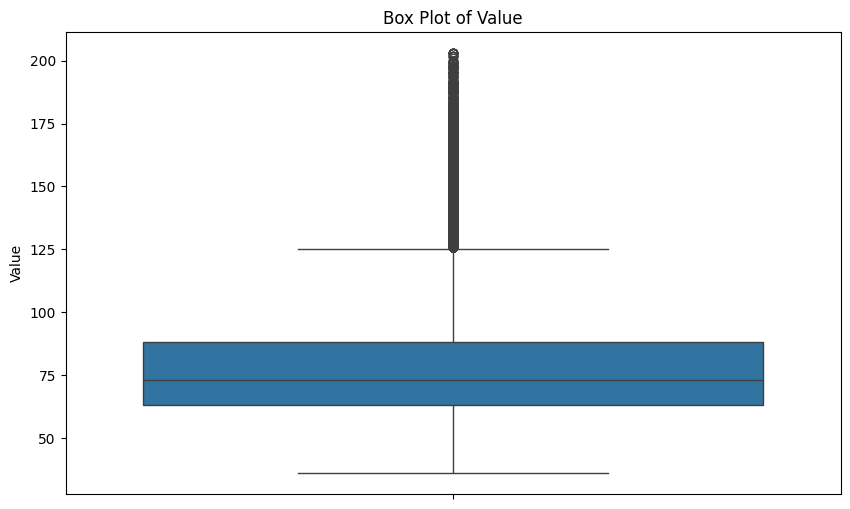

In [ ]:
# Box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y='Value', data=heartrate_seconds_merged)
plt.title('Box Plot of Value')
plt.show()

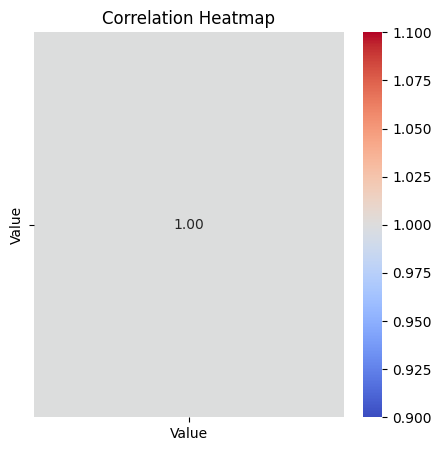

In [ ]:
# Heatmap using Seaborn
plt.figure(figsize=(5, 5))
corr_matrix = heartrate_seconds_merged[['Value']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import plotly.express as px


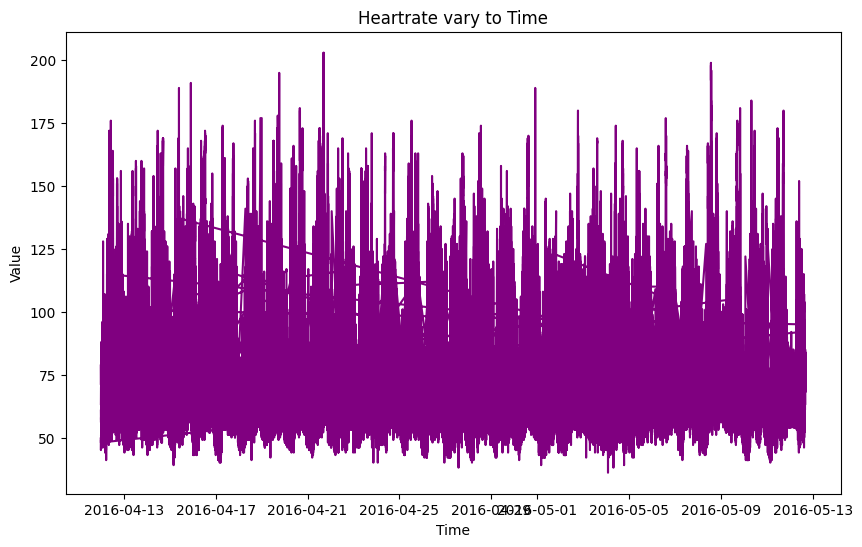

In [ ]:
# Line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(heartrate_seconds_merged['Time'], heartrate_seconds_merged['Value'], color='purple')
plt.title('Heartrate vary to Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
# Histogram using Plotly
fig = px.histogram(heartrate_seconds_merged, x='Value', nbins=50, title='Distribution of heartrate', color_discrete_sequence=['red'], labels={'Value' : 'Value'})

# Update the traces to add black edges to the histogram bars
fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.show()

In [ ]:
heartrate_seconds_merged.to_csv('Heart_Rate.csv', index = False)